In [2]:
import glob,sys,os,re
import pickle
import numpy as np
import pandas as pd
from mylab.Functions import *
# from core.context_exposure import *
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from core.Cdatabase import *
db = DataBase()

In [3]:
context_map = db.context_map

In [4]:
context_map[(context_map["part"]==6) & 1]

,Unnamed: 0,mouse_id,part,aim,index,ctx_0,ctx_1,ctx_2,rule_0,rule_1,rule_2
250,32,201033,6,test,20200901-194548,B,A,C,left,right,None
251,201,206551,6,test,20200901-204821,B,A,C,left,right,None
252,241,206552,6,test,20200901-211846,B,A,C,left,right,None
253,278,206553,6,test,20200901-215215,B,A,C,left,right,None
254,33,201033,6,test,20200902-182958,B,A,C,left,right,None
255,202,206551,6,test,20200902-194303,B,A,C,left,right,None
256,242,206552,6,test,20200902-201324,B,A,C,left,right,None
257,279,206553,6,test,20200902-204446,B,A,C,left,right,None
258,243,206552,6,test,20200904-154515,B,A,C,left,right,None
259,203,206551,6,test,20200904-162143,B,A,C,left,right,None


## index celltypes only at part6

In [4]:
# organize files according to  task
celltype_files = {
"celltype_files_lg" :[[i for i in filelists if "aim_lg" in i] for filelists in Celltypes.values()]
,"celltype_files_AB" :[[i for i in filelists if "aim_AB" in i] for filelists in Celltypes.values()]
,"celltype_files_A1B1" :[[i for i in filelists if "aim_A1B1" in i] for filelists in Celltypes.values()]
,"celltype_files_BC" :[[i for i in filelists if "aim_BC" in i] for filelists in Celltypes.values()]
,"celltype_files_B1C1" :[[i for i in filelists if "aim_B1C1" in i] for filelists in Celltypes.values()]
,"celltype_files_AC" :[[i for i in filelists if "aim_AC" in i] for filelists in Celltypes.values()]
,"celltype_files_A1C1" :[[i for i in filelists if "aim_A1C1" in i] for filelists in Celltypes.values()]
,"celltype_files_ces" :[[i for i in filelists if "aim_ce" in i] for filelists in Celltypes.values()]
,"celltype_files_ce_before_lg" : [i[:-3] for i in celltype_files_ces]
}
celltype_files_contexts={
"celltype_files_lg" :[[]]
,"celltype_files_AB" :[[i for i in filelists if "aim_AB" in i] for filelists in Celltypes.values()]
,"celltype_files_A1B1" :[[i for i in filelists if "aim_A1B1" in i] for filelists in Celltypes.values()]
,"celltype_files_BC" :[[i for i in filelists if "aim_BC" in i] for filelists in Celltypes.values()]
,"celltype_files_B1C1" :[[i for i in filelists if "aim_B1C1" in i] for filelists in Celltypes.values()]
,"celltype_files_AC" :[[i for i in filelists if "aim_AC" in i] for filelists in Celltypes.values()]
,"celltype_files_A1C1" :[[i for i in filelists if "aim_A1C1" in i] for filelists in Celltypes.values()]
,"celltype_files_ces" :[[i for i in filelists if "aim_ce" in i] for filelists in Celltypes.values()]
,"celltype_files_ce_before_lg" : [i[:-3] for i in celltype_files_ces]    
}

NameError: name 'Celltypes' is not defined

In [25]:
celltypes = db.index_celltypes(part=6)
# celltypes = glob.glob(r"C:\Users\qiushou\Desktop\part1\*.pkl")
celltypes = [i for i in celltypes if "20103" not in i]
# celltypes
[print(i) for i in celltypes if "206551" in i]

\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206551_part6_day20200901_aim_test.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206551_part6_day20200902_aim_test.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206551_part6_day20200904_aim_test.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206551_part6_day20200905_aim_all_blank.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206551_part6_day20200905_aim_test.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206551_part6_day20200906_aim_lack_wall.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206551_part6_day20200906_aim_test.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206551_part6_day20200908_aim_lack_floor.pkl
\\10.10.47.163\qiushou\LinearTrack\results\celltypes\celltype_206551_part6_day20200908_aim_test.pkl


[None, None, None, None, None, None, None, None, None]

In [29]:
mouseids = ["206551","206552","206553"]

Celltypes = {}
for mouseid in mouseids:
    filelists = [i for i in celltypes if mouseid in i]
    if not mouseid == "206553":
        Celltypes[mouseid] = {
            "celltype_files_test" :[i for i in filelists if "aim_test" in i]
            ,"celltype_files_all_blank" :[i for i in filelists if "aim_all_blank" in i] 
            ,"celltype_files_lack_wall" :[i for i in filelists if "aim_lack_wall" in i]
            ,"celltype_files_lack_floor" :[i for i in filelists if "aim_lack_floor" in i]
            ,"celltype_files_3tests" :[i for i in filelists if "aim_test" in i][0:3]
            ,"celltype_files_test_paired_all_blank":[[i for i in filelists if "aim_test" in i][3]]
            ,"celltype_files_test_paired_lack_wall":[[i for i in filelists if "aim_test" in i][4]]
            ,"celltype_files_test_paired_lack_floor":[[i for i in filelists if "aim_test" in i][5]]

        }
    else:
        Celltypes[mouseid] = {
            "celltype_files_test" :[i for i in filelists if "aim_test" in i]
            ,"celltype_files_all_blank" :[i for i in filelists if "aim_all_blank" in i] 
            ,"celltype_files_lack_wall" :[i for i in filelists if "aim_lack_wall" in i]
            ,"celltype_files_lack_floor" :[i for i in filelists if "aim_lack_floor" in i]
            ,"celltype_files_3tests" :[i for i in filelists if "aim_test" in i][0:3]
            ,"celltype_files_test_paired_all_blank":[[i for i in filelists if "aim_test" in i][4]]
            ,"celltype_files_test_paired_lack_wall":[[i for i in filelists if "aim_test" in i][5]]
            ,"celltype_files_test_paired_lack_floor":[[i for i in filelists if "aim_test" in i][5]]
        }

In [31]:
def average_percentage(celltype_files,contexts=[0,1]):
    wenn_lists=[]
    for celltype_file in celltype_files:
        ct=CellType(celltype_file)
        contextcell_id, rdcell_id,pccell_id,total_cell_num = ct.specific_ids(contexts=contexts)

        contextcell_ids= list(set(contextcell_id["ctx%scells"%contexts[0]]+contextcell_id["ctx%scells"%contexts[1]]))
        rdcell_ids = list(set(rdcell_id["context%s_leftcells"%contexts[0]]+ rdcell_id["context%s_rightcells"%contexts[0]]+ rdcell_id["context%s_leftcells"%contexts[1]]+ rdcell_id["context%s_rightcells"%contexts[1]]))
        pccell_ids = list(set(pccell_id["context%s_pccells"%contexts[0]] + pccell_id["context%s_pccells"%contexts[1]]))
    #         print(rdcell_ids)

        ctx_cellids = list(set(spread(contextcell_id.values())))
        rd_cellids = list(set(spread(rdcell_id.values())))
        pc_cellids = list(set(spread(pccell_id.values())))

        only_ctx_cellids = [i for i in ctx_cellids if not i in rd_cellids and not i in pc_cellids]
        only_rd_cellids = [i for i in rd_cellids if not i in ctx_cellids and not i in pc_cellids]
        only_pc_cellids = [i for i in pc_cellids if not i in rd_cellids and not i in ctx_cellids ]
        ctx_rd_cellids = [i for i in ctx_cellids if i in rd_cellids]                
        ctx_pc_cellids = [i for i in ctx_cellids if i in pc_cellids]
        rd_pc_cellids = [i for i in rd_cellids if i in pc_cellids]

        ctx_rd_pc_cellids = [i for i in ctx_rd_cellids if i in pc_cellids]

        wenn_list = [            
            len(ctx_cellids)/total_cell_num
            ,len(rd_cellids)/total_cell_num
            ,len(pc_cellids)/total_cell_num
            ,len(ctx_rd_cellids)/total_cell_num
            ,len(ctx_pc_cellids)/total_cell_num
            ,len(rd_pc_cellids)/total_cell_num
            ,len(ctx_rd_pc_cellids)/total_cell_num
            ,len(only_ctx_cellids)/total_cell_num
            ,len(only_rd_cellids)/total_cell_num
            ,len(only_pc_cellids)/total_cell_num]
        wenn_lists.append(wenn_list)
#         np.mean(wenn_lists,axis=0)
        
    return wenn_lists

## cell percentage of different session types

In [47]:
session_types=['celltype_files_3tests', 'celltype_files_all_blank', 'celltype_files_lack_wall', 'celltype_files_lack_floor',"celltype_files_test_paired_all_blank","celltype_files_test_paired_lack_wall","celltype_files_test_paired_lack_floor"]
contexts_types=[[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]]
mean_percentages={}
for session_type,contexts in zip(session_types,contexts_types):
    files = []
    for mouseid in mouseids:
        files.append(Celltypes[mouseid][session_type])
    mean_percentages[session_type] = [average_percentage(i,contexts=contexts) for i in files]

## plot

In [72]:

mean_percentage_all_blank = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_all_blank"]])
mean_mean_percentage_all_blank = pd.DataFrame(mean_percentage_all_blank).mean(axis=0)
sem_mean_percentage_all_blank =pd.DataFrame(mean_percentage_all_blank).sem(axis=0)

mean_percentage_lack_wall = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_lack_wall"]])
mean_mean_percentage_lack_wall = pd.DataFrame(mean_percentage_lack_wall).mean(axis=0)
sem_mean_percentage_lack_wall =pd.DataFrame(mean_percentage_lack_wall).sem(axis=0)

mean_percentage_lack_floor = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_lack_floor"]])
mean_mean_percentage_lack_floor = pd.DataFrame(mean_percentage_lack_floor).mean(axis=0)
sem_mean_percentage_lack_floor =pd.DataFrame(mean_percentage_lack_floor).sem(axis=0)

mean_percentage_test_paired_lack_floor = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_test_paired_lack_floor"]])
mean_mean_percentage_test_paired_lack_floor = pd.DataFrame(mean_percentage_test_paired_lack_floor).mean(axis=0)
sem_mean_percentage_test_paired_lack_floor =pd.DataFrame(mean_percentage_test_paired_lack_floor).sem(axis=0)

mean_percentage_test_paired_all_blank = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_test_paired_all_blank"]])
mean_mean_percentage_test_paired_all_blank = pd.DataFrame(mean_percentage_test_paired_all_blank).mean(axis=0)
sem_mean_percentage_test_paired_all_blank =pd.DataFrame(mean_percentage_test_paired_all_blank).sem(axis=0)

mean_percentage_test_paired_lack_wall = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_test_paired_lack_wall"]])
mean_mean_percentage_test_paired_lack_wall = pd.DataFrame(mean_percentage_test_paired_lack_wall).mean(axis=0)
sem_mean_percentage_test_paired_lack_wall =pd.DataFrame(mean_percentage_test_paired_lack_wall).sem(axis=0)




venn_lists1 = [round(i,2) for i in np.mean(mean_percentage_all_blank,axis=0)[[7,8,3,9,4,5,6]]]
venn_lists2 = [round(i,2) for i in np.mean(mean_percentage_lack_wall,axis=0)[[7,8,3,9,4,5,6]]]
venn_lists3 = [round(i,2) for i in np.mean(mean_percentage_lack_floor,axis=0)[[7,8,3,9,4,5,6]]]

venn_lists4 = [round(i,2) for i in np.mean(mean_percentage_test_paired_all_blank,axis=0)[[7,8,3,9,4,5,6]]]
venn_lists5 = [round(i,2) for i in np.mean(mean_percentage_test_paired_lack_wall,axis=0)[[7,8,3,9,4,5,6]]]
venn_lists6 = [round(i,2) for i in np.mean(mean_percentage_test_paired_lack_floor,axis=0)[[7,8,3,9,4,5,6]]]

Text(0.5, 1.0, 'lack_floor')

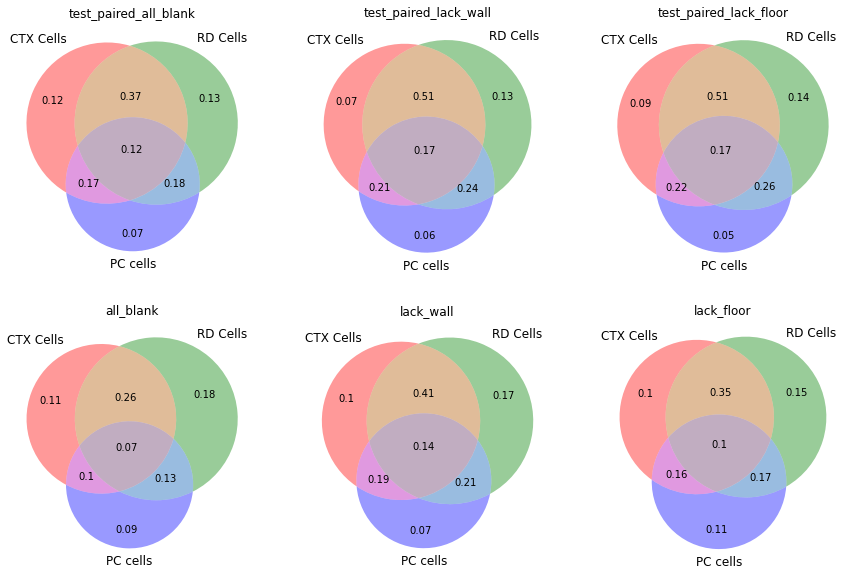

In [73]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.subplot(231)
venn3(venn_lists4,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("test_paired_all_blank")

plt.subplot(232)
venn3(venn_lists5,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("test_paired_lack_wall")
plt.subplot(233)
venn3(venn_lists6,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("test_paired_lack_floor")

plt.subplot(234)
venn3(venn_lists1,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("all_blank")
plt.subplot(235)
venn3(venn_lists2,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("lack_wall")
plt.subplot(236)
venn3(venn_lists3,set_labels=("CTX Cells","RD Cells","PC cells"))
plt.title("lack_floor")


In [ ]:

mean_percentage_all_blank = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_all_blank"]])
mean_mean_percentage_all_blank = pd.DataFrame(mean_percentage_all_blank).mean(axis=0)
sem_mean_percentage_all_blank =pd.DataFrame(mean_percentage_all_blank).sem(axis=0)

mean_percentage_lack_wall = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_lack_wall"]])
mean_mean_percentage_lack_wall = pd.DataFrame(mean_percentage_lack_wall).mean(axis=0)
sem_mean_percentage_lack_wall =pd.DataFrame(mean_percentage_lack_wall).sem(axis=0)

mean_percentage_lack_floor = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_lack_floor"]])
mean_mean_percentage_lack_floor = pd.DataFrame(mean_percentage_lack_floor).mean(axis=0)
sem_mean_percentage_lack_floor =pd.DataFrame(mean_percentage_lack_floor).sem(axis=0)

mean_percentage_test_paired_lack_floor = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_test_paired_lack_floor"]])
mean_mean_percentage_test_paired_lack_floor = pd.DataFrame(mean_percentage_test_paired_lack_floor).mean(axis=0)
sem_mean_percentage_test_paired_lack_floor =pd.DataFrame(mean_percentage_test_paired_lack_floor).sem(axis=0)

mean_percentage_test_paired_all_blank = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_test_paired_all_blank"]])
mean_mean_percentage_test_paired_all_blank = pd.DataFrame(mean_percentage_test_paired_all_blank).mean(axis=0)
sem_mean_percentage_test_paired_all_blank =pd.DataFrame(mean_percentage_test_paired_all_blank).sem(axis=0)

mean_percentage_test_paired_lack_wall = np.array([np.mean(i,axis=0) for i in mean_percentages["celltype_files_test_paired_lack_wall"]])
mean_mean_percentage_test_paired_lack_wall = pd.DataFrame(mean_percentage_test_paired_lack_wall).mean(axis=0)
sem_mean_percentage_test_paired_lack_wall =pd.DataFrame(mean_percentage_test_paired_lack_wall).sem(axis=0)


#### test vs all_blank

--------------------------
0 0.10880943004054568
--------------------------
1 0.5929800980174267
--------------------------
2 0.10880943004054568
--------------------------
3 0.28504940740261275
--------------------------
4 0.28504940740261275
--------------------------
5 0.28504940740261275
--------------------------
6 0.28504940740261275
--------------------------
7 1.0
--------------------------
8 0.28504940740261275
--------------------------
9 0.28504940740261275


C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


([], <a list of 0 Text major ticklabel objects>)

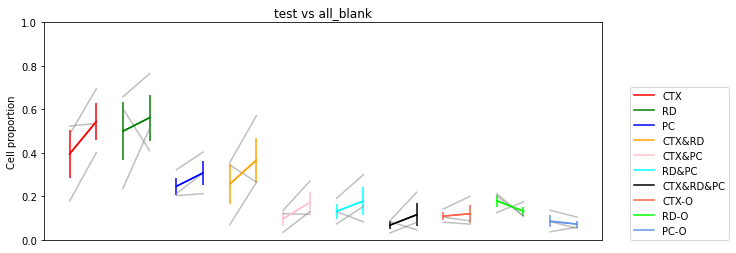

In [87]:
from mylab.ana.Mstat import *
plt.figure(figsize=(10,4))
for i in range(10):
    print("--------------------------")
    print(i,Wilcoxon_signed_ranktest(mean_percentage_test_paired_all_blank[:,i]-mean_percentage_all_blank[:,i])[1])

colors = ["red","green","blue","orange","pink","cyan","black","tomato","lime","cornflowerblue"]
handles=[]
for (m_a,m_b,s_a,s_b,c,i) in zip(mean_mean_percentage_all_blank,mean_mean_percentage_test_paired_all_blank
                                 ,sem_mean_percentage_all_blank,sem_mean_percentage_test_paired_all_blank,colors,np.arange(1,11)):
    h = plt.plot(np.array([1,2])+i*2,(m_a,m_b),c=c)
    handles.append(h)
    plt.errorbar(np.array([1,2])+i*2,(m_a,m_b),yerr=(s_a,s_b),c=c)
plt.legend(handles,labels=["CTX","RD","PC","CTX&RD","CTX&PC","RD&PC","CTX&RD&PC","CTX-O","RD-O","PC-O"],bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
for i in np.arange(1,11):
    for p_a,p_b in zip(mean_percentage_all_blank[:,i-1],mean_percentage_test_paired_all_blank[:,i-1]):
        plt.plot(np.array([1,2])+i*2,(p_a,p_b),color="grey",alpha=0.5)

plt.ylim(0,1)

plt.title("test vs all_blank")
plt.ylabel("Cell proportion")
plt.xticks([])

#### test vs lack_wall

--------------------------
0 0.10880943004054568
--------------------------
1 0.10880943004054568
--------------------------
2 0.5929800980174267
--------------------------
3 0.10880943004054568
--------------------------
4 0.10880943004054568
--------------------------
5 0.10880943004054568
--------------------------
6 0.10880943004054568
--------------------------
7 0.5929800980174267
--------------------------
8 0.10880943004054568
--------------------------
9 0.10880943004054568


C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


([], <a list of 0 Text major ticklabel objects>)

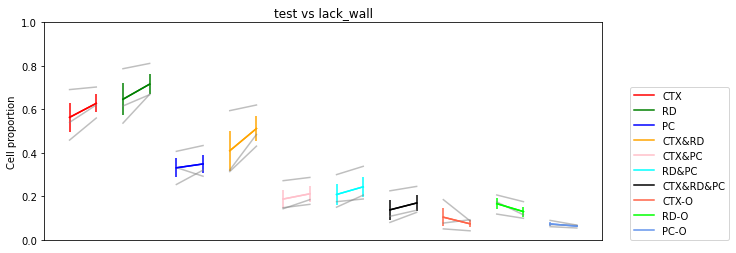

In [84]:
from mylab.ana.Mstat import *
plt.figure(figsize=(10,4))
for i in range(10):
    print("--------------------------")
    print(i,Wilcoxon_signed_ranktest(mean_percentage_test_paired_lack_wall[:,i]-mean_percentage_lack_wall[:,i])[1])

colors = ["red","green","blue","orange","pink","cyan","black","tomato","lime","cornflowerblue"]
handles=[]
for (m_a,m_b,s_a,s_b,c,i) in zip(mean_mean_percentage_lack_wall,mean_mean_percentage_test_paired_lack_wall
                                 ,sem_mean_percentage_lack_wall,sem_mean_percentage_test_paired_lack_wall,colors,np.arange(1,11)):
    h = plt.plot(np.array([1,2])+i*2,(m_a,m_b),c=c)
    handles.append(h)
    plt.errorbar(np.array([1,2])+i*2,(m_a,m_b),yerr=(s_a,s_b),c=c)
plt.legend(handles,labels=["CTX","RD","PC","CTX&RD","CTX&PC","RD&PC","CTX&RD&PC","CTX-O","RD-O","PC-O"],bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
for i in np.arange(1,11):
    for p_a,p_b in zip(mean_percentage_lack_wall[:,i-1],mean_percentage_test_paired_lack_wall[:,i-1]):
        plt.plot(np.array([1,2])+i*2,(p_a,p_b),color="grey",alpha=0.5)

plt.ylim(0,1)

plt.title("test vs lack_wall")
plt.ylabel("Cell proportion")
plt.xticks([])

#### test vs lack_floor

--------------------------
0 0.28504940740261275
--------------------------
1 0.10880943004054568
--------------------------
2 0.28504940740261275
--------------------------
3 0.10880943004054568
--------------------------
4 0.10880943004054568
--------------------------
5 0.10880943004054568
--------------------------
6 0.10880943004054568
--------------------------
7 0.28504940740261275
--------------------------
8 0.28504940740261275
--------------------------
9 0.28504940740261275


C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


([], <a list of 0 Text major ticklabel objects>)

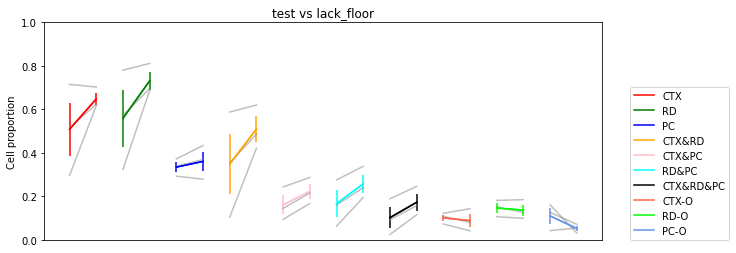

In [86]:
from mylab.ana.Mstat import *
plt.figure(figsize=(10,4))
for i in range(10):
    print("--------------------------")
    print(i,Wilcoxon_signed_ranktest(mean_percentage_test_paired_lack_floor[:,i]-mean_percentage_lack_floor[:,i])[1])

colors = ["red","green","blue","orange","pink","cyan","black","tomato","lime","cornflowerblue"]
handles=[]
for (m_a,m_b,s_a,s_b,c,i) in zip(mean_mean_percentage_lack_floor,mean_mean_percentage_test_paired_lack_floor
                                 ,sem_mean_percentage_lack_floor,sem_mean_percentage_test_paired_lack_floor,colors,np.arange(1,11)):
    h = plt.plot(np.array([1,2])+i*2,(m_a,m_b),c=c)
    handles.append(h)
    plt.errorbar(np.array([1,2])+i*2,(m_a,m_b),yerr=(s_a,s_b),c=c)
plt.legend(handles,labels=["CTX","RD","PC","CTX&RD","CTX&PC","RD&PC","CTX&RD&PC","CTX-O","RD-O","PC-O"],bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
for i in np.arange(1,11):
    for p_a,p_b in zip(mean_percentage_lack_floor[:,i-1],mean_percentage_test_paired_lack_floor[:,i-1]):
        plt.plot(np.array([1,2])+i*2,(p_a,p_b),color="grey",alpha=0.5)

plt.ylim(0,1)

plt.title("test vs lack_floor")
plt.ylabel("Cell proportion")
plt.xticks([])

### single cell example

In [90]:
Celltypes["206551"].keys()

dict_keys(['celltype_files_test', 'celltype_files_all_blank', 'celltype_files_lack_wall', 'celltype_files_lack_floor', 'celltype_files_3tests', 'celltype_files_test_paired_all_blank', 'celltype_files_test_paired_lack_wall', 'celltype_files_test_paired_lack_floor'])

In [ ]:
# celltype_files_AB A1B1
# A/A1: ct.result["contextcells"]["ctx0_1"]["context0_cells"]
# B/B1: ct.result["contextcells"]["ctx0_1"]["context1_cells"]
# celltype_files_AC A1C1
# A/A1: ct.result["contextcells"]["ctx1_2"]["context1_cells"]
# C/C1: ct.result["contextcells"]["ctx1_2"]["context2_cells"]
# celltype_files_BC B1C1
# B/B1: ct.result["contextcells"]["ctx1_2"]["context1_cells"]
# C/C1: ct.result["contextcells"]["ctx1_2"]["context2_cells"]

def New_celltypes(Celltypes):
    Wa_cells_ = []
    Fa_cells_ = []
    Wb_cells_ = []
    Fb_cells_ = []
    CtxA_cells_ = []
    CtxB_cells_ = []
    for mouseid in mouseids:
        ct1=CellType(Celltypes[mouseid]["celltype_files_AB"][0])
        ct2=CellType(Celltypes[mouseid]["celltype_files_A1B1"][0])
        ct3=CellType(Celltypes[mouseid]["celltype_files_AC"][0])
        ct4=CellType(Celltypes[mouseid]["celltype_files_A1C1"][0])
        ct5=CellType(Celltypes[mouseid]["celltype_files_BC"][0])
        ct6=CellType(Celltypes[mouseid]["celltype_files_B1C1"][0])

        # Wa
        Wa_cells = [i for i in ct1.result["contextcells"]["ctx0_1"]["context0_cells"] 
            if i in ct2.result["contextcells"]["ctx0_1"]["context0_cells"] and
               i in ct3.result["contextcells"]["ctx1_2"]["context1_cells"] and
               i in ct4.result["contextcells"]["ctx1_2"]["context1_cells"] ]
        Wa_cells = [mouseid+"_"+str(i) for i in Wa_cells]
        Wa_cells_ = Wa_cells_ + Wa_cells

        # Fa
        Fa_cells = [i for i in ct1.result["contextcells"]["ctx0_1"]["context0_cells"] 
            if i in ct2.result["contextcells"]["ctx0_1"]["context1_cells"] and
               i in ct3.result["contextcells"]["ctx1_2"]["context1_cells"] and
               i in ct4.result["contextcells"]["ctx1_2"]["context2_cells"] ]
        Fa_cells = [mouseid+"_"+str(i) for i in Fa_cells]
        Fa_cells_ = Fa_cells_ + Fa_cells

        # Wb
        Wb_cells = [i for i in ct1.result["contextcells"]["ctx0_1"]["context1_cells"] 
            if i in ct2.result["contextcells"]["ctx0_1"]["context1_cells"] and
               i in ct5.result["contextcells"]["ctx1_2"]["context1_cells"] and
               i in ct6.result["contextcells"]["ctx1_2"]["context1_cells"] ]
        Wb_cells = [mouseid+"_"+str(i) for i in Wb_cells]
        Wb_cells_ = Wb_cells_ + Wb_cells

        # Fb
        Fb_cells = [i for i in ct1.result["contextcells"]["ctx0_1"]["context1_cells"] 
            if i in ct2.result["contextcells"]["ctx0_1"]["context0_cells"] and
               i in ct5.result["contextcells"]["ctx1_2"]["context1_cells"] and
               i in ct6.result["contextcells"]["ctx1_2"]["context2_cells"] ]
        Fb_cells = [mouseid+"_"+str(i) for i in Fb_cells]
        Fb_cells_ = Fb_cells_ +Fb_cells

        # WaFa
        CtxA_cells = [i for i in ct1.result["contextcells"]["ctx0_1"]["context0_cells"] 
            if i in ct3.result["contextcells"]["ctx1_2"]["context1_cells"] ]
        CtxA_cells = [mouseid+"_"+str(i) for i in CtxA_cells]
        CtxA_cells_ = CtxA_cells_ + CtxA_cells
        # WbFb
        CtxB_cells = [i for i in ct1.result["contextcells"]["ctx0_1"]["context1_cells"] 
            if i in ct5.result["contextcells"]["ctx1_2"]["context1_cells"] ]
        CtxB_cells = [mouseid+"_"+str(i) for i in CtxB_cells]
        CtxB_cells_ = CtxB_cells_ + CtxB_cells
    return {
            "Wa_cells":Wa_cells_ ,
            "Fa_cells":Fa_cells_ ,
            "Wb_cells":Wb_cells_ ,
            "Fb_cells":Fb_cells_ ,
            "CtxA_cells":CtxA_cells_ ,
            "CtxB_cells":CtxB_cells_ 
    }